#  Linear regression

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices

The fille ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [1]:
from google.colab import files
uploaded = files.upload()
!ls

Saving ex1data2.txt to ex1data2.txt
ex1data2.txt  sample_data


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',')  # Cargar datos
print("Primeras 5 filas de datos crudos:\n", data[0:5, :])

# Separar en X (features) e y (target)
X = data[:, :2]  # Primeras dos columnas: tamaño de casa y número de habitaciones
y = data[:, 2]   # Tercera columna: precio de la casa
y = y.reshape(-1, 1)  # Convertir y a vector columna (m x 1)

# Verificación de dimensiones
print("\nDimensiones:")
print("X shape:", X.shape)  # Debe ser (m, 2)
print("y shape:", y.shape)  # Debe ser (m, 1)

# Mostrar ejemplos (CORRECTO: ahora X e y están definidos)
print('\nFirst 10 examples from the dataset:')
for i in range(10):
    print(f'x = [{X[i, 0]:.0f} {X[i, 1]:.0f}], y = {y[i, 0]:.0f}')



Primeras 5 filas de datos crudos:
 [[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]

Dimensiones:
X shape: (47, 2)
y shape: (47, 1)

First 10 examples from the dataset:
x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


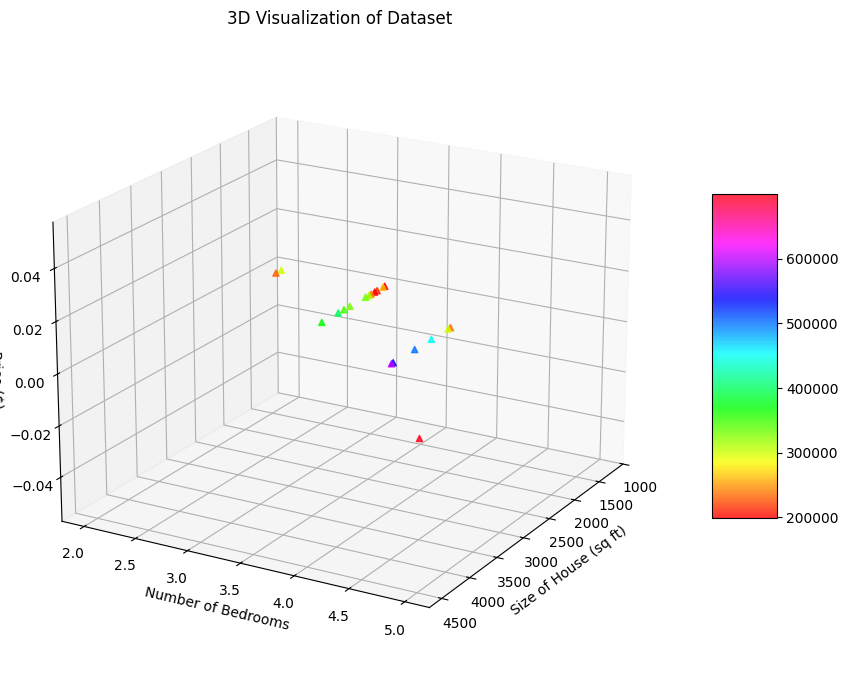

In [4]:
# ==================== Part 1: Plotting ====================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with red x markers
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(X[0:20, 0], X[0:20, 1],
                    alpha = 0.8,
                    c = y[0:20,0],
                    cmap = my_cmap,
                    marker ='^')
# Label axes
ax.set_xlabel('Size of House (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# Set grid and view angle similar to MATLAB
ax.view_init(elev=20, azim=30)
ax.grid(True)

plt.title('3D Visualization of Dataset')
plt.tight_layout()
plt.show()

# Feature normalization

Your task here is to complete the code in featureNormalize.m to

*   Subtract the mean value of each feature from the dataset.
*   After subtracting the mean, additionally scale (divide) the feature values
by their respective standard deviations

The mean and std should be:

mu= [2000.68085106    3.17021277], std = [7.94702354e+02 7.60981887e-01]

In [8]:

X = data[:, 0:2]  # Primera columna: tamaño (sq ft), segunda columna: habitaciones

def featureNormalize(X):
    """
    Normaliza las características en X.

    Args:
        X: Matriz de características (m x n), donde m = ejemplos, n = características.

    Returns:
        X_norm: Matriz normalizada (misma dimensión que X).
        mu: Vector de medias de cada característica.
        sigma: Vector de desviaciones estándar (con ddof=1 para coincidir con MATLAB).
    """
    # Calcular la media (mu) de cada característica (columna)
    mu = np.mean(X, axis=0)

    # Calcular la desviación estándar (sigma) con ddof=1 (estimación insesgada)
    sigma = np.std(X, axis=0, ddof=1)

    # Normalizar: (X - mu) / sigma
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Aplicar normalización
X_norm, mu, sigma = featureNormalize(X)

# --- Verificación ---
print("Media (mu):", mu)
print("Desviación estándar (sigma):", sigma)
print("\nPrimeros 5 ejemplos normalizados:")
print(X_norm[:5, :])

Media (mu): [2.00068085e+03 3.17021277e+00]
Desviación estándar (sigma): [7.94702354e+02 7.60981887e-01]

Primeros 5 ejemplos normalizados:
[[1.30009869e-01 -2.23675187e-01]
 [-5.04189838e-01 -2.23675187e-01]
 [5.02476364e-01 -2.23675187e-01]
 [-7.35723065e-01 -1.53776691e+00]
 [1.25747602e+00 1.09041654e+00]]


# Cost Function

The objective of linear regression is to minimize the cost function:
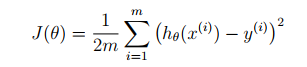

where the hypothesis h is given by

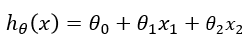




In [11]:
from scipy.optimize import minimize
m = data.shape[0]
X = data[:, 0:2]  # Características: tamaño (sq ft) y habitaciones
y = data[:, 2]    # Target: precio
y = y.reshape(-1, 1)  # Convertir y a vector columna (m x 1)

# Normalizar características
X_norm, mu, sigma = featureNormalize(X)  # Usa la función definida anteriormente
X = np.hstack([np.ones((m, 1)), X_norm])  # Añadir columna de unos (bias)

# Inicializar theta
theta = np.zeros((3, 1))  # [θ₀, θ₁, θ₂]

# Función de costo CORREGIDA
def cost_function(theta, X, y):
    m = len(y)
    predictions = X @ theta  # h_θ(x) = X * theta
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)  # Error cuadrático medio
    return J

# 5. Verificación
print("Primeras 5 filas de X (con columna de unos):\n", X[0:5, :])
print("\nModel parameters (theta inicial):\n", theta)
print(f"\nCosto inicial: {cost_function(theta, X, y):.2f}")  # Debe ser ~65591548106.07


Primeras 5 filas de X (con columna de unos):
 [[1.00000000e+00 1.30009869e-01 -2.23675187e-01]
 [1.00000000e+00 -5.04189838e-01 -2.23675187e-01]
 [1.00000000e+00 5.02476364e-01 -2.23675187e-01]
 [1.00000000e+00 -7.35723065e-01 -1.53776691e+00]
 [1.00000000e+00 1.25747602e+00 1.09041654e+00]]

Model parameters (theta inicial):
 [[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]]

Costo inicial: 65591548106.46


# Gradient descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

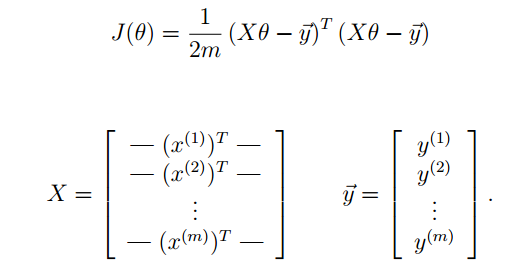

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

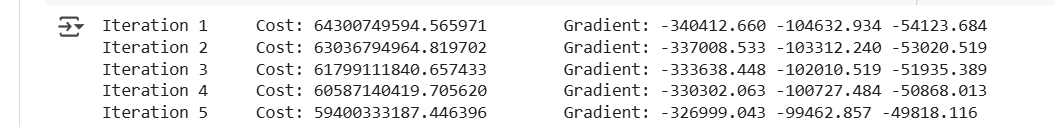

In [14]:
import numpy as np
import matplotlib.pyplot as plt



def cost_function(theta, X, y):
    """Función de costo para regresión lineal."""
    m = len(y)
    errors = X @ theta - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J

def gradientDescent(X, y, theta, alpha, iterations):
    """Descenso de gradiente con impresión del gradiente."""
    m = len(y)
    J_history = np.zeros(iterations)

    print("Iteración\tCosto\t\tGradiente (θ₀, θ₁, θ₂)")
    print("--------\t------\t\t----------------------")

    for iter in range(iterations):
        # Calcular gradiente
        grad_J = (X.T @ (X @ theta - y)) / m

        # Actualizar theta
        theta = theta - alpha * grad_J

        # Guardar costo
        J_history[iter] = cost_function(theta, X, y)

        # Imprimir solo las primeras 5 iteraciones
        if iter < 5:
            print(f"{iter + 1:8}\t{J_history[iter]:.6f}\t{grad_J[0, 0]:.6f}, {grad_J[1, 0]:.6f}, {grad_J[2, 0]:.6f}")

    return theta

# --- Ejecución ---
# Inicializar parámetros
theta = np.zeros((3, 1))  # [θ₀, θ₁, θ₂]
alpha = 0.01
iterations = 300

# Ejecutar descenso de gradiente
print("Iniciando descenso de gradiente...\n")
theta = gradientDescent(X, y, theta, alpha, iterations)

# Resultados finales
print("\nTheta óptimo encontrado:")
print(f"θ₀ = {theta[0, 0]:.6f}")
print(f"θ₁ = {theta[1, 0]:.6f}")
print(f"θ₂ = {theta[2, 0]:.6f}")

Iniciando descenso de gradiente...

Iteración	Costo		Gradiente (θ₀, θ₁, θ₂)
--------	------		----------------------
       1	64300749594.565971	-340412.659574, -104632.933766, -54123.683844
       2	63036794964.819695	-337008.532979, -103312.240277, -53020.518742
       3	61799111840.657433	-333638.447649, -102010.518654, -51935.388675
       4	60587140419.705620	-330302.063172, -100727.484373, -50868.013154
       5	59400333187.446388	-326999.042541, -99462.857233, -49818.115996

Theta óptimo encontrado:
θ₀ = 323718.518396
θ₁ = 94051.931608
θ₂ = 8900.673914


# Visualization

#Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for
the dataset and find a learning rate that converges quickly. You can change
the learning rate and call the function "gradientDescent".

You need to modify "gradientDescent" function and it should also return the history of J(θ) values in a vector J. After the last iteration, the ex1 multi.m script plots the J values against
the number of the iterations.

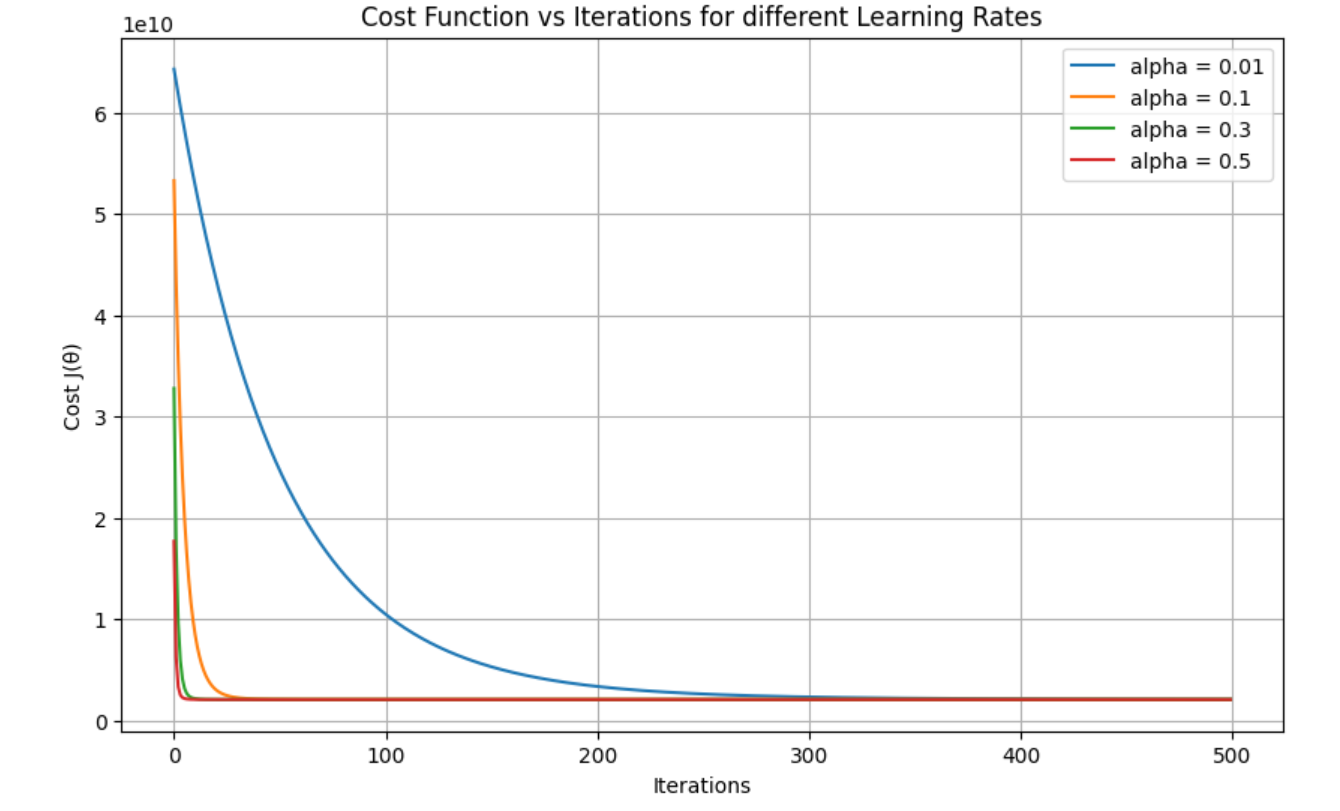

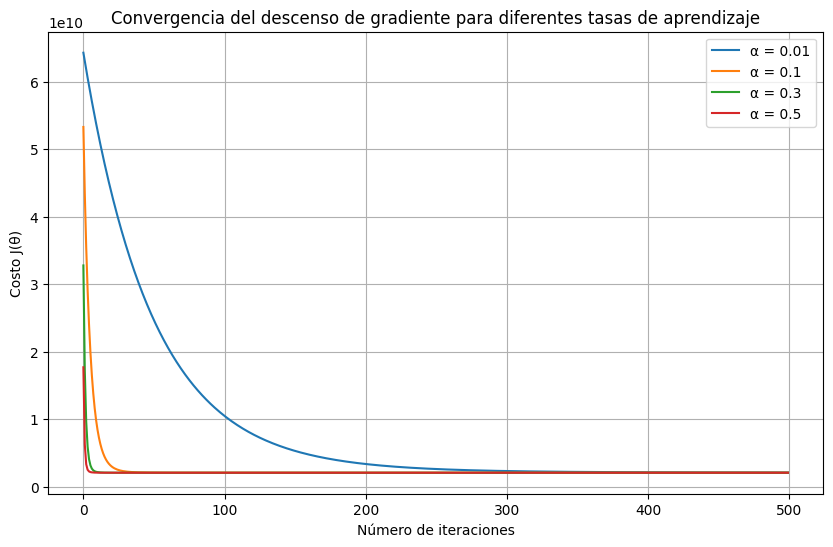

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta, X, y):
    """Calcula el costo para regresión lineal."""
    m = len(y)
    errors = X @ theta - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J

def gradientDescent(X, y, theta, alpha, iterations):
    """
    Descenso de gradiente modificado para devolver el historial de costos.

    Args:
        X: Matriz de características (con columna de unos).
        y: Vector objetivo.
        theta: Parámetros iniciales.
        alpha: Tasa de aprendizaje.
        iterations: Número de iteraciones.

    Returns:
        theta: Parámetros optimizados.
        J_history: Vector con historial de costos.
    """
    m = len(y)
    J_history = np.zeros(iterations)

    for iter in range(iterations):
        # Calcular gradiente y actualizar theta
        grad_J = (X.T @ (X @ theta - y)) / m
        theta = theta - alpha * grad_J

        # Guardar costo en cada iteración
        J_history[iter] = cost_function(theta, X, y)

    return theta, J_history

# --- Configuración inicial ---
iterations = 500
alpha_vector = np.array([0.01, 0.1, 0.3, 0.5])  # Diferentes tasas de aprendizaje
matrix_J = np.zeros((iterations, len(alpha_vector)))  # Para almacenar todos los costos


# --- Probar cada tasa de aprendizaje ---
for i, alpha in enumerate(alpha_vector):
    theta_initial = np.zeros((3, 1))  # Reiniciar theta para cada alpha
    theta_opt, J_history = gradientDescent(X, y, theta_initial, alpha, iterations)
    matrix_J[:, i] = J_history  # Guardar historial de costos

# --- Graficar la convergencia para cada alpha ---
plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alpha_vector):
    plt.plot(range(iterations), matrix_J[:, i], label=f'α = {alpha}')

plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J(θ)')
plt.title('Convergencia del descenso de gradiente para diferentes tasas de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()
